#TASK 1 Loading the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import imageio
import pandas as pd
from zipfile import ZipFile
from PIL import Image

In [2]:
metaData= loadmat("C:/Users/gurun/Desktop/2/wiki_labeled.mat",squeeze_me= True , struct_as_record=True)
Dateofbirth = metaData['wiki_labeled']['dob'].item(0)
Dateofbirth
full_path = metaData['wiki_labeled']['full_path'].item(0)
full_path



array(['17/10000217_1981-05-05_2009.png', '12/100012_1948-07-03_2008.png',
       '65/10001965_1930-05-23_1961.png', ...,
       '09/9998109_1972-12-27_2013.png', '00/9999400_1981-12-13_2011.png',
       '80/999980_1954-06-11_2008.png'], dtype=object)

In [3]:
AGE = metaData['wiki_labeled']['age'].item(0)
AGE
import imageio
im = imageio.imread("C:/Users/gurun/Desktop/2/wiki_labeled/"+ full_path[0])
im
im = im.flatten()
import numpy as np
Images = np.empty((60327,10000))
i = 0
for f in full_path:
    im = imageio.imread("C:/Users/gurun/Desktop/2/wiki_labeled/"+f)
    Images[i] =  im.flatten()
    i = i+1
    

#TASK 2 Randomly split the dataset into 80% training and 20% test sets

In [4]:
ATrain = Images
BTrain = AGE

from sklearn.model_selection import train_test_split
Atrain, Atest = train_test_split(ATrain, test_size=0.2, random_state=12457)

Btrain, Btest = train_test_split(BTrain, test_size=0.2, random_state=12457)

In [5]:
from sklearn.preprocessing import StandardScaler
A_standard = StandardScaler().fit_transform(Atrain)

In [6]:
A_standard

array([[-0.92722987, -0.93856414, -0.90046037, ..., -1.04301797,
        -0.80879472, -0.2401972 ],
       [ 1.34073168,  1.30907863,  1.33720808, ...,  0.76217648,
         0.66111533,  0.54368782],
       [-1.180566  , -1.18024615, -1.17865699, ..., -1.07795722,
        -1.01721481, -1.01319493],
       ...,
       [ 0.18262365,  0.22150955,  0.27280363, ..., -0.89161457,
        -0.79782524, -0.74101263],
       [-0.16722148, -0.23768628, -0.30778062, ...,  1.49590068,
         1.51673462,  1.51265681],
       [ 0.95469567,  0.9586397 ,  0.96224742, ..., -0.75185758,
        -0.71006942, -0.70835075]])

In [7]:
Mean_Vectors = np.mean(A_standard, axis=0)

#Task 3 Computing the Principle Component Analysis

In [8]:
Covariance_Matrix = (A_standard - Mean_Vectors).T.dot((A_standard - Mean_Vectors)) / (A_standard.shape[0]-1)
print('Covariance matrix \n%s' %Covariance_Matrix)

Covariance matrix 
[[1.00002072 0.99069761 0.97670942 ... 0.37338502 0.37201165 0.37473141]
 [0.99069761 1.00002072 0.99071352 ... 0.37308208 0.37204657 0.374817  ]
 [0.97670942 0.99071352 1.00002072 ... 0.37286202 0.37219016 0.37508323]
 ...
 [0.37338502 0.37308208 0.37286202 ... 1.00002072 0.97921134 0.95667133]
 [0.37201165 0.37204657 0.37219016 ... 0.97921134 1.00002072 0.98519616]
 [0.37473141 0.374817   0.37508323 ... 0.95667133 0.98519616 1.00002072]]


In [9]:
Eigenvalue, Eigenvector = np.linalg.eig(Covariance_Matrix)

In [10]:
print('Displaying the Eigenvectors \n%s' % Eigenvector)
print('\n Displaying the Eigenvalues \n%s' %Eigenvalue)

Displaying the Eigenvectors 
[[-4.30759874e-03 -2.28950032e-02 -9.53984834e-03 ... -1.06933567e-03
  -1.79051881e-03 -6.08852930e-04]
 [-4.35774119e-03 -2.28334745e-02 -9.31016884e-03 ... -9.26472471e-04
   5.28745941e-03  5.44781126e-03]
 [-4.39645065e-03 -2.27676769e-02 -8.96939459e-03 ...  7.99780771e-04
  -5.95573653e-03 -5.06984287e-03]
 ...
 [-6.93558488e-03 -9.12553063e-03 -1.59643641e-02 ...  2.48562075e-03
  -1.55718949e-03 -1.45552331e-03]
 [-7.79453444e-03 -7.46090949e-03 -1.54530710e-02 ...  3.71755991e-04
   1.52333830e-03 -5.23430718e-04]
 [-7.84176173e-03 -7.41690606e-03 -1.55424458e-02 ... -6.59723751e-04
   4.85901447e-05  3.70871452e-04]]

 Displaying the Eigenvalues 
[7.58567951e+03 8.17363756e+02 1.91024238e+02 ... 2.81869116e-04
 2.82021836e-04 2.73722202e-04]


In [11]:
# Make a list of (eigenvalue, eigenvector) tuples
Eigen_pairs = [(np.abs(Eigenvalue[i]), Eigenvector[:,i]) for i in range(len(Eigenvalue))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
Eigen_pairs.sort()
Eigen_pairs.reverse()

In [12]:
Total = sum(Eigenvalue)
var_exp = [(i / Total)*100 for i in sorted(Eigenvalue, reverse=True)]

#TASK 4 DRAW A SCREE PLOT

<Figure size 432x288 with 0 Axes>

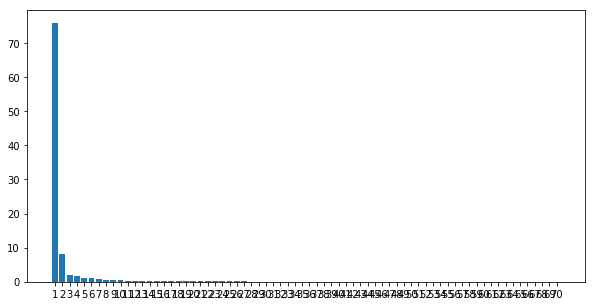

In [13]:
plt.figure()
f, ax = plt.subplots(figsize=(10,5))
plt.bar(np.arange(70),var_exp[0:70])
plt.xticks(np.arange(70), ['{}'.format(i) for i  in np.arange(1,71)])
plt.show()

In [14]:
EigenPairs = Eigen_pairs[0:100]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])

In [15]:

Split_A = A_standard.dot(P)
Split_A.shape

(48261, 100)

In [16]:
Split_A.shape

(48261, 100)

In [17]:
Split_A1 = np.dot(Split_A, P.transpose())

In [18]:
Split_A1.shape

(48261, 10000)

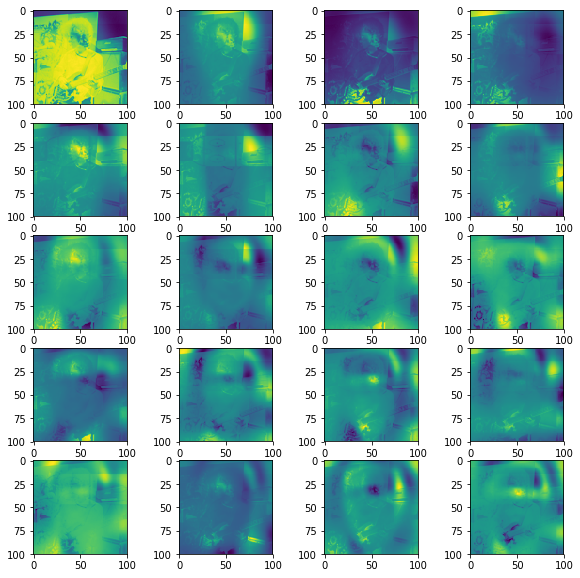

In [19]:
fig = plt.figure(figsize=(10,10))

for i in range(1,21):
    img = EigenPairs[i][1].reshape(100,100)
    fig.add_subplot(5,4,i)
    plt.imshow(img)
plt.show()

#TASK 5 SHOWING GHOST FACES

In [20]:
from sklearn.preprocessing import StandardScaler
Atest_standard = StandardScaler().fit_transform(Atest)



In [21]:
MeanVector = np.mean(Atest_standard, axis=0)

In [22]:
Atest_standard = Atest_standard - MeanVector

In [23]:
Split_AT = Atest_standard.dot(P)

In [24]:
#Scaling is performed here
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)


[[ 0.17407157  1.00851232  0.15801073 ...  1.7383612   2.05643851
   0.77771718]
 [ 0.09335766 -0.42314751 -1.10402415 ...  0.11882107  1.02634013
   1.79241295]
 [ 0.68365246  1.38669093 -0.41989301 ...  0.02482649  0.00511247
   0.00932535]
 ...
 [ 0.13871389  0.97920745  0.84489988 ... -0.33882445 -0.96350578
   0.304647  ]
 [-0.09409002  0.36260854  0.91690043 ...  0.44199611 -0.1601872
  -2.08855337]
 [-0.10459692 -0.54354946  0.68354786 ... -0.25387401  1.88938068
  -0.01838711]]


In [25]:
Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A

array([[ 1.        ,  0.17407157,  1.00851232, ...,  1.7383612 ,
         2.05643851,  0.77771718],
       [ 1.        ,  0.09335766, -0.42314751, ...,  0.11882107,
         1.02634013,  1.79241295],
       [ 1.        ,  0.68365246,  1.38669093, ...,  0.02482649,
         0.00511247,  0.00932535],
       ...,
       [ 1.        ,  0.13871389,  0.97920745, ..., -0.33882445,
        -0.96350578,  0.304647  ],
       [ 1.        , -0.09409002,  0.36260854, ...,  0.44199611,
        -0.1601872 , -2.08855337],
       [ 1.        , -0.10459692, -0.54354946, ..., -0.25387401,
         1.88938068, -0.01838711]])

#TASK 7 PERFORMING STOCHASTIC GRADIENT DESCENT based on the liner regression

In [26]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [27]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.1,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history



In [28]:

np.random.seed(3784)
theta = np.random.randn(101,1)


In [29]:
theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)

#TASK 8 REPORTING THE Root Mean Squared Error

In [30]:
b_prediction = np.dot(Split_A,theta)

In [31]:
RMSE_1 = np.sqrt(np.mean((b_prediction - Btest)**2))

In [32]:
RMSE_1

23.770131743172705

In [33]:
b_prediction

array([[31.45530407],
       [32.93675327],
       [37.04260991],
       ...,
       [42.93870179],
       [40.3799518 ],
       [36.25397688]])

In [34]:
metaData= loadmat("C:/Users/gurun/Desktop/2/wiki_judgeX.mat",squeeze_me= True , struct_as_record=True)

full_path = metaData['wiki_judgeX']['full_path'].item(0)
full_path




array(['1.png', '2.png', '3.png', ..., '1999.png', '2000.png', '2001.png'],
      dtype=object)

#TASK 9 Generating the Submission.CSV file

In [35]:
import imageio
im = imageio.imread("C:/Users/gurun/Desktop/2/wiki_judge_images/"+ full_path[0])
im
im = im.flatten()
import numpy as np
New_Images = np.empty((2001,10000))
i = 0
for f in full_path:
    im = imageio.imread("C:/Users/gurun/Desktop/2/wiki_judge_images/"+f)
    New_Images[i] =  im.flatten()
    i = i+1

In [36]:
New_Images.shape

(2001, 10000)

In [37]:
New_Images_reduced = New_Images.dot(P)

In [38]:
New_Images_reduced.shape

(2001, 100)

In [39]:
sc = StandardScaler()
New_Images_reduced_S = sc.fit_transform(New_Images_reduced)
New_Images_reduced_S= np.insert(New_Images_reduced_S, 0, values=1, axis=1)


In [40]:
b_judge_predict = np.dot(New_Images_reduced_S,theta)

In [41]:
b_judge_predict

array([[44.60891732],
       [42.62585088],
       [23.82629119],
       ...,
       [48.59525216],
       [31.85251827],
       [47.76317662]])

In [42]:
import numpy as np
np.savetxt("C:/Users/gurun/Desktop/2/submission1.csv", b_judge_predict, delimiter= ",")

#Task 10 REPEAT STEPS 2-8 to find the Average RMSE and Standard deviation

Covariance matrix 
[[1.00002072 0.99048418 0.97650635 ... 0.37571117 0.37508505 0.37832243]
 [0.99048418 1.00002072 0.99075933 ... 0.37480271 0.37456273 0.37781561]
 [0.97650635 0.99075933 1.00002072 ... 0.37439024 0.37452007 0.37781321]
 ...
 [0.37571117 0.37480271 0.37439024 ... 1.00002072 0.97942238 0.95696972]
 [0.37508505 0.37456273 0.37452007 ... 0.97942238 1.00002072 0.98531085]
 [0.37832243 0.37781561 0.37781321 ... 0.95696972 0.98531085 1.00002072]]
Displaying the Eigenvectors 
[[-0.00432062 -0.02289391 -0.00935239 ...  0.00040882 -0.00050837
  -0.00056686]
 [-0.00436895 -0.02281616 -0.00911109 ... -0.00361102 -0.00337588
   0.00012173]
 [-0.00440628 -0.02274545 -0.00876466 ...  0.00347158  0.00584338
   0.00270579]
 ...
 [-0.00693645 -0.00913623 -0.01675275 ...  0.00326591 -0.00255622
  -0.00194208]
 [-0.00779207 -0.00747476 -0.01621679 ... -0.00254702  0.00175951
   0.00099407]
 [-0.00784096 -0.00744475 -0.01629689 ...  0.00159889 -0.00068025
  -0.00090726]]

 Displaying the

<Figure size 432x288 with 0 Axes>

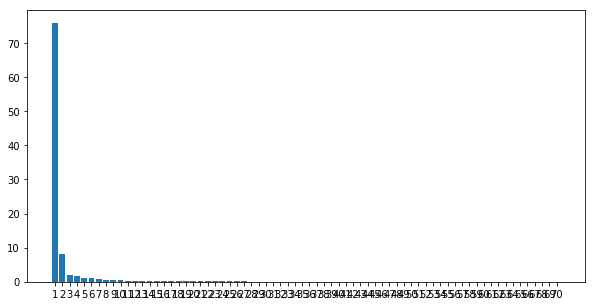

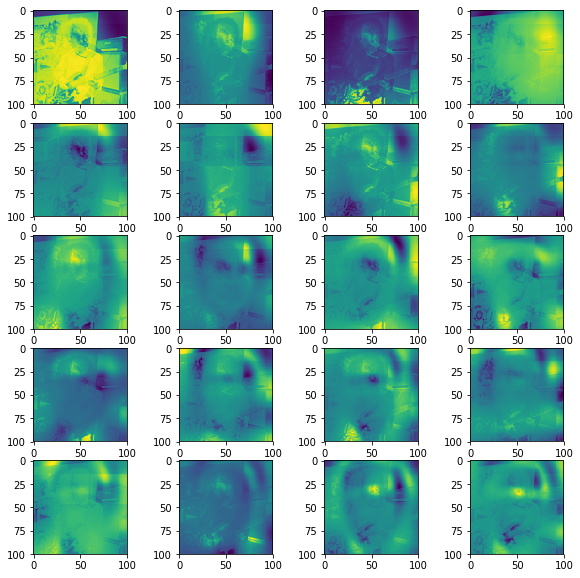

[[-0.32127053 -0.95859241  0.4005288  ...  0.94384391 -0.73769965
   1.75351428]
 [ 0.68255656  1.38131648 -0.40979277 ... -0.04265686 -0.02628629
   0.01897138]
 [-0.27554708 -0.29459392  0.39424622 ...  0.08194789 -0.7142542
  -0.39506157]
 ...
 [ 0.15167403  0.92997641  1.8057291  ...  0.55337814 -0.13962054
   0.86489956]
 [ 0.1442822   0.20653096  0.02870578 ...  1.14235477  1.29576391
   0.92271573]
 [-0.62029245 -1.60180291  0.90414237 ...  0.08917197 -0.30907863
   0.18305682]]


array([[42.21137658],
       [36.77058672],
       [31.49129683],
       ...,
       [49.69981974],
       [37.03900025],
       [ 8.35834917]])

In [97]:
ATrain = Images
BTrain = AGE
from sklearn.model_selection import train_test_split
Atrain, Atest = train_test_split(ATrain, test_size=0.2, random_state=32643)
Btrain, Btest = train_test_split(BTrain, test_size=0.2, random_state=32643)


from sklearn.preprocessing import StandardScaler
A_standard = StandardScaler().fit_transform(Atrain)

A_standard

Mean_Vectors = np.mean(A_standard, axis=0)


Covariance_Matrix = (A_standard - Mean_Vectors).T.dot((A_standard - Mean_Vectors)) / (A_standard.shape[0]-1)
print('Covariance matrix \n%s' %Covariance_Matrix)


Eigenvalue, Eigenvector = np.linalg.eig(Covariance_Matrix)

print('Displaying the Eigenvectors \n%s' % Eigenvector)
print('\n Displaying the Eigenvalues \n%s' %Eigenvalue)

# Make a list of (eigenvalue, eigenvector) tuples
Eigen_pairs = [(np.abs(Eigenvalue[i]), Eigenvector[:,i]) for i in range(len(Eigenvalue))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
Eigen_pairs.sort()
Eigen_pairs.reverse()

Total = sum(Eigenvalue)
var_exp = [(i / Total)*100 for i in sorted(Eigenvalue, reverse=True)]

plt.figure()
f, ax = plt.subplots(figsize=(10,5))
plt.bar(np.arange(70),var_exp[0:70])
plt.xticks(np.arange(70), ['{}'.format(i) for i  in np.arange(1,71)])
plt.show()


EigenPairs = Eigen_pairs[0:50]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])



Split_A = A_standard.dot(P)
Split_A.shape

Split_A1 = np.dot(Split_A, P.transpose())

fig = plt.figure(figsize=(10,10))

for i in range(1,21):
    img = EigenPairs[i][1].reshape(100,100)
    fig.add_subplot(5,4,i)
    plt.imshow(img)
plt.show()


from sklearn.preprocessing import StandardScaler
Atest_standard = StandardScaler().fit_transform(Atest)


MeanVector = np.mean(Atest_standard, axis=0)


Atest_standard = Atest_standard - MeanVector


Split_AT = Atest_standard.dot(P)

#Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)


Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A


def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


def stocashtic_gradient_descent(X,y,theta,learning_rate=0.1,iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history


np.random.seed(3784)
theta = np.random.randn(51,1)



theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)



b_prediction = np.dot(Split_A,theta)



RMSE_2 = np.sqrt(np.mean((b_prediction - Btest)**2))

RMSE_2

b_prediction

In [98]:
RMSE_2

23.40120370594583

In [1]:
RMSE_1 = 23.770131743172705
RMSE_2 = 23.401203705945830
RMSE_3 = 22.475654976225176
RMSE_4 = 21.751622707793480

In [6]:
AverageRMSE = (RMSE_1 + RMSE_2  + RMSE_3 + RMSE_4 )/ 4
print(AverageRMSE)

22.849653283284297


In [7]:
import numpy as np
UltimateStdDev = np.std([RMSE_1, RMSE_2 , RMSE_3 , RMSE_4 ])/4
print(UltimateStdDev)

0.19752509105856467


In [9]:
UltimateRMSE = AverageRMSE +- UltimateStdDev
print(UltimateRMSE)

22.65212819222573


#TASK 11 DRAW A PLOT BETWEEN ( K vs Root Mean Squared Error) For K values ( 2, 10, 20, 40, 50, 60, 80, 100, 200 )

#FINDING THE RMSE FOR THE K value = 2

In [43]:
EigenPairs = Eigen_pairs[0:2]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])

Split_A = A_standard.dot(P)

from sklearn.preprocessing import StandardScaler
Atest_standard = StandardScaler().fit_transform(Atest)

MeanVector = np.mean(A_standard, axis=0)

Atest_standard = Atest_standard - MeanVector

Split_AT = Atest_standard.dot(P)

#Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)

Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A


[[ 0.17407157  1.00851232]
 [ 0.09335766 -0.42314751]
 [ 0.68365246  1.38669093]
 ...
 [ 0.13871389  0.97920745]
 [-0.09409002  0.36260854]
 [-0.10459692 -0.54354946]]


array([[ 1.        ,  0.17407157,  1.00851232],
       [ 1.        ,  0.09335766, -0.42314751],
       [ 1.        ,  0.68365246,  1.38669093],
       ...,
       [ 1.        ,  0.13871389,  0.97920745],
       [ 1.        , -0.09409002,  0.36260854],
       [ 1.        , -0.10459692, -0.54354946]])

In [44]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.1,iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [46]:
np.random.seed(4283)
theta = np.random.randn(3,1)

theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)

b_prediction = np.dot(Split_A,theta)

In [48]:
RMSE_2 = np.sqrt(np.mean((b_prediction - Btest)**2))

In [49]:
RMSE_2

22.806885140560308

#FINDING THE RMSE FOR THE K value = 10

In [50]:
EigenPairs = Eigen_pairs[0:10]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])

Split_A = A_standard.dot(P)

from sklearn.preprocessing import StandardScaler
Atest_standard = StandardScaler().fit_transform(Atest)

MeanVector = np.mean(A_standard, axis=0)

Atest_standard = Atest_standard - MeanVector

Split_AT = Atest_standard.dot(P)

#Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)

Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A


[[ 0.17407157  1.00851232  0.15801073 ... -0.21674681 -0.48708054
   1.23622861]
 [ 0.09335766 -0.42314751 -1.10402415 ...  1.68975107 -1.15842565
  -0.57271731]
 [ 0.68365246  1.38669093 -0.41989301 ...  0.42527598  0.01825535
  -0.16100572]
 ...
 [ 0.13871389  0.97920745  0.84489988 ... -1.39422094 -0.76279636
  -0.851612  ]
 [-0.09409002  0.36260854  0.91690043 ...  0.79443108  0.46213564
   0.37275173]
 [-0.10459692 -0.54354946  0.68354786 ...  0.48386513  0.19614425
  -0.81727338]]


array([[ 1.        ,  0.17407157,  1.00851232, ..., -0.21674681,
        -0.48708054,  1.23622861],
       [ 1.        ,  0.09335766, -0.42314751, ...,  1.68975107,
        -1.15842565, -0.57271731],
       [ 1.        ,  0.68365246,  1.38669093, ...,  0.42527598,
         0.01825535, -0.16100572],
       ...,
       [ 1.        ,  0.13871389,  0.97920745, ..., -1.39422094,
        -0.76279636, -0.851612  ],
       [ 1.        , -0.09409002,  0.36260854, ...,  0.79443108,
         0.46213564,  0.37275173],
       [ 1.        , -0.10459692, -0.54354946, ...,  0.48386513,
         0.19614425, -0.81727338]])

In [51]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.2,iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [52]:
np.random.seed(8743)
theta = np.random.randn(11,1)

theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)

b_prediction = np.dot(Split_A,theta)

In [53]:
RMSE_10 = np.sqrt(np.mean((b_prediction - Btest)**2))

In [54]:
RMSE_10

23.51550041471764

#FINDING THE RMSE FOR THE K value = 20

In [56]:
EigenPairs = Eigen_pairs[0:20]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])

Split_A = A_standard.dot(P)

from sklearn.preprocessing import StandardScaler
Atest_standard = StandardScaler().fit_transform(Atest)

MeanVector = np.mean(A_standard, axis=0)

Atest_standard = Atest_standard - MeanVector

Split_AT = Atest_standard.dot(P)

#Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)

Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A


[[ 0.17407157  1.00851232  0.15801073 ... -0.13473508 -1.17538329
   1.86225099]
 [ 0.09335766 -0.42314751 -1.10402415 ...  0.61457233 -1.4970938
   1.64402795]
 [ 0.68365246  1.38669093 -0.41989301 ...  0.17356047 -0.14932459
  -0.15141458]
 ...
 [ 0.13871389  0.97920745  0.84489988 ...  0.17367594  1.59022038
   1.79140258]
 [-0.09409002  0.36260854  0.91690043 ...  0.42270915  1.65058181
  -1.27043335]
 [-0.10459692 -0.54354946  0.68354786 ...  0.97365172 -0.84835355
   1.79537931]]


array([[ 1.        ,  0.17407157,  1.00851232, ..., -0.13473508,
        -1.17538329,  1.86225099],
       [ 1.        ,  0.09335766, -0.42314751, ...,  0.61457233,
        -1.4970938 ,  1.64402795],
       [ 1.        ,  0.68365246,  1.38669093, ...,  0.17356047,
        -0.14932459, -0.15141458],
       ...,
       [ 1.        ,  0.13871389,  0.97920745, ...,  0.17367594,
         1.59022038,  1.79140258],
       [ 1.        , -0.09409002,  0.36260854, ...,  0.42270915,
         1.65058181, -1.27043335],
       [ 1.        , -0.10459692, -0.54354946, ...,  0.97365172,
        -0.84835355,  1.79537931]])

In [57]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.3,iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [58]:
np.random.seed(8743)
theta = np.random.randn(21,1)

theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)

b_prediction = np.dot(Split_A,theta)

In [59]:
RMSE_20 = np.sqrt(np.mean((b_prediction - Btest)**2))

In [60]:
RMSE_20

23.569829964457686

#FINDING THE RMSE FOR THE K value = 40

In [61]:


EigenPairs = Eigen_pairs[0:40]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])

Split_A = A_standard.dot(P)

from sklearn.preprocessing import StandardScaler
Atest_std = StandardScaler().fit_transform(Atest)

MeanVector = np.mean(A_standard, axis=0)

Atest_standard = Atest_standard - MeanVector

Split_AT = Atest_standard.dot(P)

#Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)

Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A


[[ 0.17407157  1.00851232  0.15801073 ... -1.14712855 -1.36873927
  -0.22603312]
 [ 0.09335766 -0.42314751 -1.10402415 ...  2.09347697 -2.66943879
  -0.18034769]
 [ 0.68365246  1.38669093 -0.41989301 ...  0.04720467  0.04556447
   0.00534063]
 ...
 [ 0.13871389  0.97920745  0.84489988 ... -0.98901268 -0.17120497
  -0.82488873]
 [-0.09409002  0.36260854  0.91690043 ... -0.2952593   0.38604913
  -0.9270192 ]
 [-0.10459692 -0.54354946  0.68354786 ...  0.09168329  1.36999167
  -1.25890898]]


array([[ 1.        ,  0.17407157,  1.00851232, ..., -1.14712855,
        -1.36873927, -0.22603312],
       [ 1.        ,  0.09335766, -0.42314751, ...,  2.09347697,
        -2.66943879, -0.18034769],
       [ 1.        ,  0.68365246,  1.38669093, ...,  0.04720467,
         0.04556447,  0.00534063],
       ...,
       [ 1.        ,  0.13871389,  0.97920745, ..., -0.98901268,
        -0.17120497, -0.82488873],
       [ 1.        , -0.09409002,  0.36260854, ..., -0.2952593 ,
         0.38604913, -0.9270192 ],
       [ 1.        , -0.10459692, -0.54354946, ...,  0.09168329,
         1.36999167, -1.25890898]])

In [64]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.4,iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [65]:
np.random.seed(7463)
theta = np.random.randn(41,1)

theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)

b_prediction = np.dot(Split_A,theta)

In [66]:
RMSE_40 = np.sqrt(np.mean((b_prediction - Btest)**2))

In [67]:
RMSE_40

23.69613711809581

#FINDING THE RMSE FOR THE K value = 50

In [68]:
EigenPairs = Eigen_pairs[0:50]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])

Split_A = A_standard.dot(P)

from sklearn.preprocessing import StandardScaler
Atest_standard = StandardScaler().fit_transform(Atest)

MeanVector = np.mean(A_standard, axis=0)

Atest_standard = Atest_standard - MeanVector

Split_AT = Atest_standard.dot(P)

#Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)

Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A

[[ 1.74071574e-01  1.00851232e+00  1.58010732e-01 ...  1.01677450e+00
  -1.59175531e+00  8.99547697e-01]
 [ 9.33576605e-02 -4.23147511e-01 -1.10402415e+00 ...  1.81753095e+00
  -6.75039783e-02  1.02650497e+00]
 [ 6.83652461e-01  1.38669093e+00 -4.19893008e-01 ...  3.82667625e-02
  -4.29500408e-02 -1.72809467e-03]
 ...
 [ 1.38713888e-01  9.79207449e-01  8.44899885e-01 ... -7.98103829e-01
   1.00256314e+00 -5.59437404e-01]
 [-9.40900185e-02  3.62608545e-01  9.16900426e-01 ...  4.40184813e-01
   1.67355890e+00 -2.66946566e+00]
 [-1.04596917e-01 -5.43549462e-01  6.83547864e-01 ... -1.94022930e-01
   2.44240399e-02 -3.54633947e-01]]


array([[ 1.00000000e+00,  1.74071574e-01,  1.00851232e+00, ...,
         1.01677450e+00, -1.59175531e+00,  8.99547697e-01],
       [ 1.00000000e+00,  9.33576605e-02, -4.23147511e-01, ...,
         1.81753095e+00, -6.75039783e-02,  1.02650497e+00],
       [ 1.00000000e+00,  6.83652461e-01,  1.38669093e+00, ...,
         3.82667625e-02, -4.29500408e-02, -1.72809467e-03],
       ...,
       [ 1.00000000e+00,  1.38713888e-01,  9.79207449e-01, ...,
        -7.98103829e-01,  1.00256314e+00, -5.59437404e-01],
       [ 1.00000000e+00, -9.40900185e-02,  3.62608545e-01, ...,
         4.40184813e-01,  1.67355890e+00, -2.66946566e+00],
       [ 1.00000000e+00, -1.04596917e-01, -5.43549462e-01, ...,
        -1.94022930e-01,  2.44240399e-02, -3.54633947e-01]])

In [69]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.1,iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [70]:
np.random.seed(3793)
theta = np.random.randn(51,1)

theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)

b_prediction = np.dot(Split_A,theta)

In [71]:
RMSE_50 = np.sqrt(np.mean((b_prediction - Btest)**2))

In [72]:
RMSE_50

23.71081842083581

#FINDING THE RMSE FOR THE K value = 60

In [73]:
EigenPairs = Eigen_pairs[0:60]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])

Split_A = A_standard.dot(P)

from sklearn.preprocessing import StandardScaler
Atest_standard = StandardScaler().fit_transform(Atest)

MeanVector = np.mean(A_standard, axis=0)

Atest_standardd = Atest_standard - MeanVector

Split_AT = Atest_standard.dot(P)

#Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)

Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A


[[ 0.17407157  1.00851232  0.15801073 ... -2.2450686  -0.07254654
  -0.28020966]
 [ 0.09335766 -0.42314751 -1.10402415 ...  0.88094685  0.05457977
  -1.01776776]
 [ 0.68365246  1.38669093 -0.41989301 ... -0.05012101  0.10796478
  -0.04491523]
 ...
 [ 0.13871389  0.97920745  0.84489988 ...  0.30399068 -0.37883788
  -0.2272374 ]
 [-0.09409002  0.36260854  0.91690043 ...  2.24088316 -0.67731055
  -1.85112256]
 [-0.10459692 -0.54354946  0.68354786 ... -0.88340836 -0.71089442
   2.31530642]]


array([[ 1.        ,  0.17407157,  1.00851232, ..., -2.2450686 ,
        -0.07254654, -0.28020966],
       [ 1.        ,  0.09335766, -0.42314751, ...,  0.88094685,
         0.05457977, -1.01776776],
       [ 1.        ,  0.68365246,  1.38669093, ..., -0.05012101,
         0.10796478, -0.04491523],
       ...,
       [ 1.        ,  0.13871389,  0.97920745, ...,  0.30399068,
        -0.37883788, -0.2272374 ],
       [ 1.        , -0.09409002,  0.36260854, ...,  2.24088316,
        -0.67731055, -1.85112256],
       [ 1.        , -0.10459692, -0.54354946, ..., -0.88340836,
        -0.71089442,  2.31530642]])

In [74]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.2,iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [75]:
np.random.seed(3625)
theta = np.random.randn(61,1)

theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)

b_prediction = np.dot(Split_A,theta)

In [76]:
RMSE_60 = np.sqrt(np.mean((b_prediction - Btest)**2))

In [77]:
RMSE_60

23.721338651861398

#FINDING THE RMSE FOR THE K value = 80

In [78]:


EigenPairs = Eigen_pairs[0:80]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])

Split_A = A_standard.dot(P)

from sklearn.preprocessing import StandardScaler
Atest_std = StandardScaler().fit_transform(Atest)

MeanVector = np.mean(A_standard, axis=0)

Atest_standard = Atest_standard - MeanVector

Split_AT = Atest_standard.dot(P)

#Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)

Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A


[[ 1.74071574e-01  1.00851232e+00  1.58010732e-01 ... -6.88052970e-01
  -4.43585317e-02 -1.99247107e-03]
 [ 9.33576605e-02 -4.23147511e-01 -1.10402415e+00 ... -1.10191480e-01
  -5.55886384e-01 -1.49254508e-02]
 [ 6.83652461e-01  1.38669093e+00 -4.19893008e-01 ... -1.54739400e-02
   2.66663003e-02  7.77247911e-02]
 ...
 [ 1.38713888e-01  9.79207449e-01  8.44899885e-01 ... -1.61540712e+00
  -1.39932237e-01  1.28621605e-01]
 [-9.40900185e-02  3.62608545e-01  9.16900426e-01 ...  3.27338291e+00
   6.30046801e-01 -1.21371745e+00]
 [-1.04596917e-01 -5.43549462e-01  6.83547864e-01 ... -3.12757110e-01
  -2.13189417e+00  1.25331910e+00]]


array([[ 1.00000000e+00,  1.74071574e-01,  1.00851232e+00, ...,
        -6.88052970e-01, -4.43585317e-02, -1.99247107e-03],
       [ 1.00000000e+00,  9.33576605e-02, -4.23147511e-01, ...,
        -1.10191480e-01, -5.55886384e-01, -1.49254508e-02],
       [ 1.00000000e+00,  6.83652461e-01,  1.38669093e+00, ...,
        -1.54739400e-02,  2.66663003e-02,  7.77247911e-02],
       ...,
       [ 1.00000000e+00,  1.38713888e-01,  9.79207449e-01, ...,
        -1.61540712e+00, -1.39932237e-01,  1.28621605e-01],
       [ 1.00000000e+00, -9.40900185e-02,  3.62608545e-01, ...,
         3.27338291e+00,  6.30046801e-01, -1.21371745e+00],
       [ 1.00000000e+00, -1.04596917e-01, -5.43549462e-01, ...,
        -3.12757110e-01, -2.13189417e+00,  1.25331910e+00]])

In [79]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.3,iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [81]:
np.random.seed(5637)
theta = np.random.randn(81,1)

theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)

b_prediction = np.dot(Split_A,theta)

In [82]:
RMSE_80 = np.sqrt(np.mean((b_prediction - Btest)**2))

In [83]:
RMSE_80

23.744865903980738

#FINDING THE RMSE FOR THE K value = 100

In [84]:
EigenPairs = Eigen_pairs[0:100]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])

Split_A = A_standard.dot(P)

from sklearn.preprocessing import StandardScaler
Atest_standard = StandardScaler().fit_transform(Atest)

MeanVector = np.mean(A_standard, axis=0)

Atest_standard = Atest_standard - MeanVector

Split_AT = Atest_standard.dot(P)

#Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)

Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A


[[ 0.17407157  1.00851232  0.15801073 ...  1.7383612   2.05643851
   0.77771718]
 [ 0.09335766 -0.42314751 -1.10402415 ...  0.11882107  1.02634013
   1.79241295]
 [ 0.68365246  1.38669093 -0.41989301 ...  0.02482649  0.00511247
   0.00932535]
 ...
 [ 0.13871389  0.97920745  0.84489988 ... -0.33882445 -0.96350578
   0.304647  ]
 [-0.09409002  0.36260854  0.91690043 ...  0.44199611 -0.1601872
  -2.08855337]
 [-0.10459692 -0.54354946  0.68354786 ... -0.25387401  1.88938068
  -0.01838711]]


array([[ 1.        ,  0.17407157,  1.00851232, ...,  1.7383612 ,
         2.05643851,  0.77771718],
       [ 1.        ,  0.09335766, -0.42314751, ...,  0.11882107,
         1.02634013,  1.79241295],
       [ 1.        ,  0.68365246,  1.38669093, ...,  0.02482649,
         0.00511247,  0.00932535],
       ...,
       [ 1.        ,  0.13871389,  0.97920745, ..., -0.33882445,
        -0.96350578,  0.304647  ],
       [ 1.        , -0.09409002,  0.36260854, ...,  0.44199611,
        -0.1601872 , -2.08855337],
       [ 1.        , -0.10459692, -0.54354946, ..., -0.25387401,
         1.88938068, -0.01838711]])

In [85]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.4,iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [86]:
np.random.seed(9337)
theta = np.random.randn(101,1)

theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)

b_prediction = np.dot(Split_A,theta)

In [87]:
RMSE_100 = np.sqrt(np.mean((b_prediction - Btest)**2))

In [88]:
RMSE_100

23.780365011876185

#FINDING THE RMSE FOR THE K value = 200

In [89]:
EigenPairs = Eigen_pairs[0:200]
P = np.hstack( [i[1].reshape(10000, 1) for i in EigenPairs])

Split_A = A_standard.dot(P)

from sklearn.preprocessing import StandardScaler
Atest_standard = StandardScaler().fit_transform(Atest)

MeanVector = np.mean(A_standard, axis=0)

Atest_standard = Atest_standard - MeanVector

Split_AT = Atest_standard.dot(P)

#Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Split_A = sc.fit_transform(Split_A)

print(Split_A)

sc = StandardScaler()
Split_AT = sc.fit_transform(Split_AT)
Split_AT= np.insert(Split_AT, 0, values=1, axis=1)

Split_A.shape
Split_A= np.insert(Split_A, 0, values=1, axis=1)
Split_A


[[ 0.17407157  1.00851232  0.15801073 ...  1.19562968  0.13176892
  -0.47318494]
 [ 0.09335766 -0.42314751 -1.10402415 ...  1.2648222  -0.15040933
  -3.60243879]
 [ 0.68365246  1.38669093 -0.41989301 ...  0.00372019 -0.03485454
   0.0061005 ]
 ...
 [ 0.13871389  0.97920745  0.84489988 ... -1.18220332  0.12789454
   1.24506557]
 [-0.09409002  0.36260854  0.91690043 ...  0.7050195   0.61906798
  -1.83355102]
 [-0.10459692 -0.54354946  0.68354786 ...  0.48439299  0.78686162
  -2.21780808]]


array([[ 1.        ,  0.17407157,  1.00851232, ...,  1.19562968,
         0.13176892, -0.47318494],
       [ 1.        ,  0.09335766, -0.42314751, ...,  1.2648222 ,
        -0.15040933, -3.60243879],
       [ 1.        ,  0.68365246,  1.38669093, ...,  0.00372019,
        -0.03485454,  0.0061005 ],
       ...,
       [ 1.        ,  0.13871389,  0.97920745, ..., -1.18220332,
         0.12789454,  1.24506557],
       [ 1.        , -0.09409002,  0.36260854, ...,  0.7050195 ,
         0.61906798, -1.83355102],
       [ 1.        , -0.10459692, -0.54354946, ...,  0.48439299,
         0.78686162, -2.21780808]])

In [90]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stocashtic_gradient_descent(X,y,theta,learning_rate=0.1,iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [91]:
np.random.seed(4673)
theta = np.random.randn(201,1)

theta,cost_history = stocashtic_gradient_descent(Split_A, Btrain, theta)

b_prediction = np.dot(Split_A,theta)

In [92]:
RMSE_200 = np.sqrt(np.mean((b_prediction - Btest)**2))

In [93]:
RMSE_200

23.84152528356556

In [94]:
K_VALUES=[2,10,20,40,50,60,80,100,200]
ROOT_MEAN_SQUARED_ERROR =[RMSE_2, RMSE_10, RMSE_20, RMSE_40, RMSE_50, RMSE_60, RMSE_80, RMSE_100, RMSE_200]

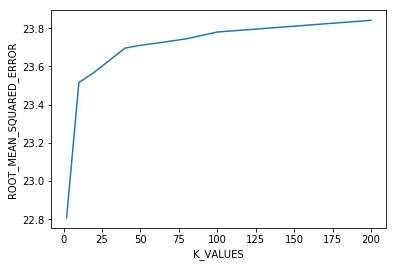

In [96]:
import matplotlib.pyplot as plt
plt.xlabel('K_VALUES')
plt.ylabel('ROOT_MEAN_SQUARED_ERROR')
plt.plot(K_VALUES,ROOT_MEAN_SQUARED_ERROR)
plt.show()

#TASK 12 Submission.csv file in Kaggle

In [ ]:
#Model Parameters for Kaggle submission
k value = 20
Learning Rate = 0.1
Iterations = 1000
